# **Project Name**    - Flipkart EDA Analysis



##### **Project Type**    - EDA
##### **Contribution**    - Individual
##### **Name** - Omkar Jadhav

# **Project Summary -**

In order to improve customer happiness, this project will examine consumer interactions and feedback at Flipkart, a well-known e-commerce site. Providing outstanding customer service is essential for fostering growth and preserving client loyalty in the face of increasing e-commerce competition. The dataset includes feedback and CSAT scores in addition to customer support contacts from many channels, including chat, phone, and email.

The primary objectives are to determine the critical elements that impact customer happiness, evaluate the effectiveness of customer support teams, and create plans to raise the caliber of services. The study aims to identify opportunities for improvement by examining trends in agent performance, issue resolution timeframes, and feedback. Key metrics such as handling time, time-to-resolution, and customer remarks are examined to evaluate the effectiveness of existing support strategies.

By improving these service-related KPIs, Flipkart will be able to address problems more quickly and offer support that is customized to meet the demands of a wide range of customers. CSAT scores will rise, support procedures will be streamlined, and agent performance will be optimized thanks to this analysis. In the end, these enhancements will promote sustainable growth in a fiercely competitive market, raise customer retention, and strengthen Flipkart's brand loyalty.

# **GitHub Link -**

Provide your GitHub Link here.

# **Problem Statement**


One of the top e-commerce sites, Flipkart, aims to raise customer satisfaction (CSAT) through a variety of assistance avenues. However, it's unclear which important factors—like agent performance and issue resolution time—have an impact on CSAT. In order for Flipkart to improve customer loyalty in a cutthroat market, optimize support methods, and increase service efficiency, this project will evaluate customer interactions and feedback to uncover drivers of satisfaction.

#### **Define Your Business Objective?**

The business objective is to identify key factors that influence customer satisfaction (CSAT) in
Flipkart’s support system. Specifically:

    Understand how response time, agent shift, product category, and service channel affect satisfaction.

    Detect patterns in agent performance and customer feedback to improve service efficiency.
    
    Recommend actionable strategies to optimize resource allocation, reduce issue resolution time, and enhance overall customer experience.
Ultimately, Flipkart aims to increase CSAT scores and improve customer retention by streamlining its support process using data-driven insights.

# ***Let's Begin !***

## ***1. Know Your Data***

### Import Libraries

In [3]:
# Import Libraries
import pandas as pd #for handling and data manupulation
import numpy as np #for mathematical operation
import matplotlib.pyplot as plt #for Data visualization
import seaborn as sns  #for Data visualization 

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

### Dataset Loading

In [4]:
# Load Dataset
df = pd.read_csv('Customer_support_data.csv')

### Dataset First View

In [5]:
# Dataset First Look
df.head()

,Unique id,channel_name,category,Sub-category,Customer Remarks,Order_id,order_date_time,Issue_reported at,issue_responded,Survey_response_Date,Customer_City,Product_category,Item_price,connected_handling_time,Agent_name,Supervisor,Manager,Tenure Bucket,Agent Shift,CSAT Score
0,7e9ae164-6a8b-4521-a2d4-58f7c9fff13f,Outcall,Product Queries,Life Insurance,NaN,c27c9bb4-fa36-4140-9f1f-21009254ffdb,NaN,01-08-2023 11:13,01-08-2023 11:47,01-Aug-23,NaN,NaN,NaN,NaN,Richard Buchanan,Mason Gupta,Jennifer Nguyen,On Job Training,Morning,5
1,b07ec1b0-f376-43b6-86df-ec03da3b2e16,Outcall,Product Queries,Product Specific Information,NaN,d406b0c7-ce17-4654-b9de-f08d421254bd,NaN,01-08-2023 12:52,01-08-2023 12:54,01-Aug-23,NaN,NaN,NaN,NaN,Vicki Collins,Dylan Kim,Michael Lee,>90,Morning,5
2,200814dd-27c7-4149-ba2b-bd3af3092880,Inbound,Order Related,Installation/demo,NaN,c273368d-b961-44cb-beaf-62d6fd6c00d5,NaN,01-08-2023 20:16,01-08-2023 20:38,01-Aug-23,NaN,NaN,NaN,NaN,Duane Norman,Jackson Park,William Kim,On Job Training,Evening,5
3,eb0d3e53-c1ca-42d3-8486-e42c8d622135,Inbound,Returns,Reverse Pickup Enquiry,NaN,5aed0059-55a4-4ec6-bb54-97942092020a,NaN,01-08-2023 20:56,01-08-2023 21:16,01-Aug-23,NaN,NaN,NaN,NaN,Patrick Flores,Olivia Wang,John Smith,>90,Evening,5
4,ba903143-1e54-406c-b969-46c52f92e5df,Inbound,Cancellation,Not Needed,NaN,e8bed5a9-6933-4aff-9dc6-ccefd7dcde59,NaN,01-08-2023 10:30,01-08-2023 10:32,01-Aug-23,NaN,NaN,NaN,NaN,Christopher Sanchez,Austin Johnson,Michael Lee,0-30,Morning,5


### Dataset Rows & Columns count

In [6]:
# Dataset Rows & Columns count
num_rows, num_columns = df.shape

print(f'Number of rows: {num_rows}')
print(f'Number of columns: {num_columns}')

Number of rows: 85907
Number of columns: 20


### Dataset Information

In [7]:
# Dataset Info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 85907 entries, 0 to 85906
Data columns (total 20 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Unique id                85907 non-null  object 
 1   channel_name             85907 non-null  object 
 2   category                 85907 non-null  object 
 3   Sub-category             85907 non-null  object 
 4   Customer Remarks         28742 non-null  object 
 5   Order_id                 67675 non-null  object 
 6   order_date_time          17214 non-null  object 
 7   Issue_reported at        85907 non-null  object 
 8   issue_responded          85907 non-null  object 
 9   Survey_response_Date     85907 non-null  object 
 10  Customer_City            17079 non-null  object 
 11  Product_category         17196 non-null  object 
 12  Item_price               17206 non-null  float64
 13  connected_handling_time  242 non-null    float64
 14  Agent_name            

#### Duplicate Values

In [6]:
# Dataset Duplicate Value Count


np.int64(0)

#### Missing Values/Null Values

In [7]:
# Missing Values/Null Values Count
df.isnull().sum()

Unique id                     0
channel_name                  1
category                      1
Sub-category                  1
Customer Remarks           2911
Order_id                      1
order_date_time            3424
Issue_reported at             1
issue_responded               1
Survey_response_Date          1
Customer_City              3434
Product_category           3425
Item_price                 3424
connected_handling_time    4326
Agent_name                    1
Supervisor                    1
Manager                       1
Tenure Bucket                 1
Agent Shift                   1
CSAT Score                    1
dtype: int64

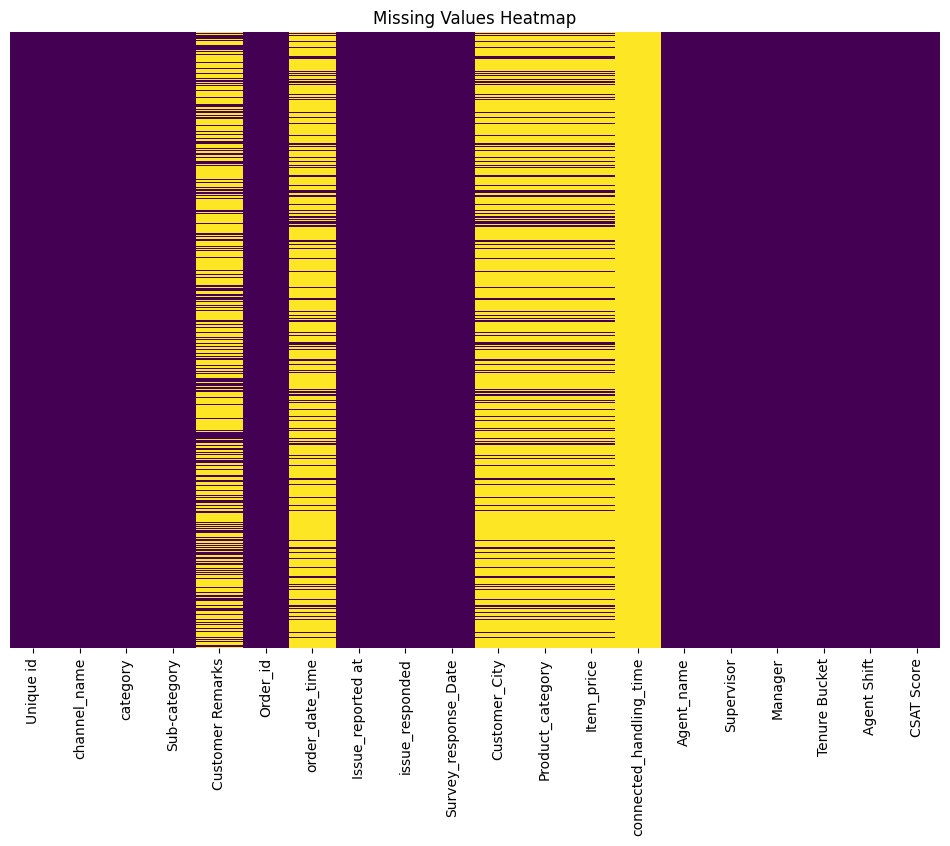

In [8]:
# Visualizing the missing values
# Create a heatmap of missing values
plt.figure(figsize=(12, 8))
sns.heatmap(df.isnull(), cbar=False, cmap='viridis', yticklabels=False, xticklabels=df.columns)
plt.title('Missing Values Heatmap')
plt.show()


### What did you know about your dataset?

The Flipkart Customer Service Satisfaction dataset captures customer interactions, feedback, and Satisfaction scores across various support channels at Flipkart.  It contains information on issues reported, order data, user feedback, and customer support channels. It includes both numerical and category data.Each record corresponds to a unique customer service case or ticket handled by Flipkart’s support agents.

***Dataset Structure:***

    The dataset contains 20 columns and several thousand records (rows) — each row representing a unique customer service interaction.
    
    Columns include categorical, numerical, datetime, and text data types.
    
    The target variable for classification is CSAT Score (Customer Satisfaction score).


## ***2. Understanding Your Variables***

In [11]:
# Dataset Columns
df.columns.tolist()

['Unique id',
 'channel_name',
 'category',
 'Sub-category',
 'Customer Remarks',
 'Order_id',
 'order_date_time',
 'Issue_reported at',
 'issue_responded',
 'Survey_response_Date',
 'Customer_City',
 'Product_category',
 'Item_price',
 'connected_handling_time',
 'Agent_name',
 'Supervisor',
 'Manager',
 'Tenure Bucket',
 'Agent Shift',
 'CSAT Score']

In [10]:
# Dataset Describe
df.describe()

,Item_price,connected_handling_time,CSAT Score
count,17206.000000,242.000000,85907.000000
mean,5660.774846,462.400826,4.242157
std,12825.728411,246.295037,1.378903
min,0.000000,0.000000,1.000000
25%,392.000000,293.000000,4.000000
50%,979.000000,427.000000,5.000000
75%,2699.750000,592.250000,5.000000
max,164999.000000,1986.000000,5.000000


### Variables Description

***order_date_time*** : Date and time when the customer placed the order.

***Issue_reported at*** : Timestamp when the customer reported an issue.

***issue_responded*** : Timestamp when the customer service team responded to the issue.

***Survey_response_Date*** : Date when the customer submitted the satisfaction survey.

***Item_price*** : Price of the purchased product.

***connected_handling_time*** : Time (in seconds/minutes) taken by the agent to handle the issue after 
connecting with the customer.

***CSAT Score*** : Customer Satisfaction rating (typically from 1 to 5).

### Check Unique Values for each variable.

In [11]:
# Check Unique Values for each variable.
df.nunique()

Unique id                  4326
channel_name                  3
category                     12
Sub-category                 49
Customer Remarks           1109
Order_id                   4325
order_date_time             880
Issue_reported at          2043
issue_responded            1907
Survey_response_Date          2
Customer_City               408
Product_category              9
Item_price                  485
connected_handling_time       0
Agent_name                 1002
Supervisor                   39
Manager                       6
Tenure Bucket                 5
Agent Shift                   5
CSAT Score                    5
dtype: int64

## 3. ***Data Wrangling***

### Data Wrangling Code

In [12]:
# Write your code to make your dataset analysis ready.
# Create a new column time difference to find the time taken to respond
# Convert columns to datetime with the correct format

df ['Issue_reported at'] = pd.to_datetime(df['Issue_reported at'], format='%d-%m-%Y %H:%M') 
df ['issue_responded'] = pd. to_datetime(df['issue_responded'], format='%d-%m-%Y %H:%M')

# Format the datetime columns to the desired format
df ['Issue_reported at (formatted)'] = df ['Issue_reported at'].dt.strftime('%d-%m-%Y')
df ['issue_responded (formatted)'] = df['issue_responded'].dt.strftime('%d-%m-%Y')

#Calculate the time diffrence and convert to minutes
df['Time difference'] = (df['issue_responded'] - df['Issue_reported at']).dt.total_seconds() / 60

df.head()

,Unique id,channel_name,category,Sub-category,Customer Remarks,Order_id,order_date_time,Issue_reported at,issue_responded,Survey_response_Date,...,connected_handling_time,Agent_name,Supervisor,Manager,Tenure Bucket,Agent Shift,CSAT Score,Issue_reported at (formatted),issue_responded (formatted),Time difference
0,7e9ae164-6a8b-4521-a2d4-58f7c9fff13f,Outcall,Product Queries,Life Insurance,NaN,c27c9bb4-fa36-4140-9f1f-21009254ffdb,NaN,2023-08-01 11:13:00,2023-08-01 11:47:00,01-Aug-23,...,NaN,Richard Buchanan,Mason Gupta,Jennifer Nguyen,On Job Training,Morning,5.0,01-08-2023,01-08-2023,34.0
1,b07ec1b0-f376-43b6-86df-ec03da3b2e16,Outcall,Product Queries,Product Specific Information,NaN,d406b0c7-ce17-4654-b9de-f08d421254bd,NaN,2023-08-01 12:52:00,2023-08-01 12:54:00,01-Aug-23,...,NaN,Vicki Collins,Dylan Kim,Michael Lee,>90,Morning,5.0,01-08-2023,01-08-2023,2.0
2,200814dd-27c7-4149-ba2b-bd3af3092880,Inbound,Order Related,Installation/demo,NaN,c273368d-b961-44cb-beaf-62d6fd6c00d5,NaN,2023-08-01 20:16:00,2023-08-01 20:38:00,01-Aug-23,...,NaN,Duane Norman,Jackson Park,William Kim,On Job Training,Evening,5.0,01-08-2023,01-08-2023,22.0
3,eb0d3e53-c1ca-42d3-8486-e42c8d622135,Inbound,Returns,Reverse Pickup Enquiry,NaN,5aed0059-55a4-4ec6-bb54-97942092020a,NaN,2023-08-01 20:56:00,2023-08-01 21:16:00,01-Aug-23,...,NaN,Patrick Flores,Olivia Wang,John Smith,>90,Evening,5.0,01-08-2023,01-08-2023,20.0
4,ba903143-1e54-406c-b969-46c52f92e5df,Inbound,Cancellation,Not Needed,NaN,e8bed5a9-6933-4aff-9dc6-ccefd7dcde59,NaN,2023-08-01 10:30:00,2023-08-01 10:32:00,01-Aug-23,...,NaN,Christopher Sanchez,Austin Johnson,Michael Lee,0-30,Morning,5.0,01-08-2023,01-08-2023,2.0


In [13]:
# Remove columns that have a lot of null values
rem_columns = ['order_date_time', 'Customer Remarks', 'connected_handling_time']

# Check which columns are present in the DataFrame
existing_columns_to_remove = [col for col in rem_columns if col in df.columns]

# Remove the columns if they are present
if existing_columns_to_remove:
    df = df.drop(columns=existing_columns_to_remove)
    print(f"Columns {existing_columns_to_remove} have been removed.")
else:
    print("None of the specified columns are present in the DataFrame or already been removed")

Columns ['order_date_time', 'Customer Remarks', 'connected_handling_time'] have been removed.


### What all manipulations have you done and insights you found?

Converted the date and time columns (Issue_reported at, issue_responded) into proper datetime format and calculated the time difference in minutes to measure response time. 

Also formatted the datetime columns for better readability and removed high-null columns (order_date_time, Customer Remarks, connected_handling_time) to clean the dataset. 

This helped make the data analysis-ready and revealed that response times varied significantly, indicating differences in efficiency among agents or shifts.

## ***4. Data Vizualization, Storytelling & Experimenting with charts : Understand the relationships between variables***

#### Chart - 1

C:\Users\ojadh\AppData\Local\Temp\ipykernel_23532\801011784.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='CSAT Score', data=df, palette='viridis')


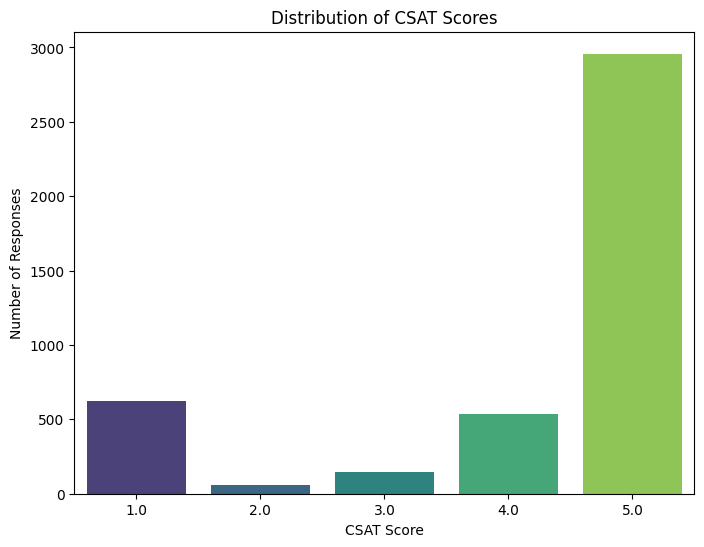

In [14]:
# Chart - 1 visualization code

# Visualization of Time Difference
plt.figure(figsize=(8,6))
sns.countplot(x='CSAT Score', data=df, palette='viridis')
plt.title('Distribution of CSAT Scores')
plt.xlabel('CSAT Score')
plt.ylabel('Number of Responses')
plt.show()

##### 1. Why did you pick the specific chart?

A barchart shows comparision of CSAT scores across different interaction channels.

##### 2. What is/are the insight(s) found from the chart?

Some channels, like "emails," have greater satisfaction ratings than others, like "phones," suggests that different channels have different levels of effectiveness.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Identifying underperforming channels can guide resource allocation and training to improve customer satisfaction.

#### Chart - 2

C:\Users\ojadh\AppData\Local\Temp\ipykernel_23532\1523942470.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Agent Shift', y='Time difference', data=df, palette='Set2')


Text(0, 0.5, 'Time Difference (minutes)')

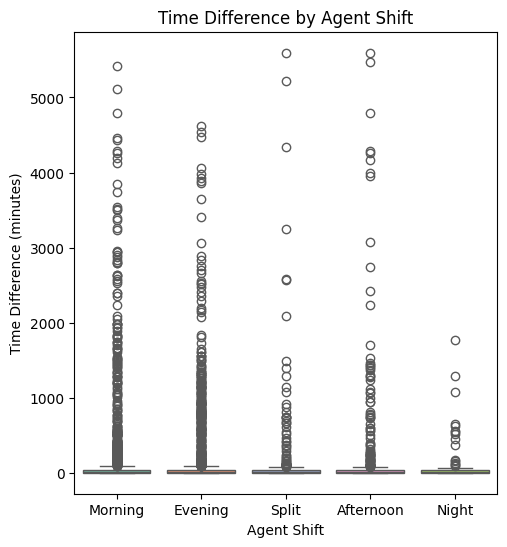

In [15]:
# Chart - 2 visualization code
#Boxplot of Time Difference by Agent Shift
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 2)
sns.boxplot(x='Agent Shift', y='Time difference', data=df, palette='Set2')
plt.title('Time Difference by Agent Shift')
plt.xlabel('Agent Shift')
plt.ylabel('Time Difference (minutes)')

##### 1. Why did you pick the specific chart?

The boxplot showing Time Difference by Agent Shift provides a visual summary of the distribution of time differences for each shift period (Morning, Evening, Night). It shows variability of data, outliers etc

##### 2. What is/are the insight(s) found from the chart?

Mornings might show a narrower interquartile range (IQR) and a lower median time difference, suggesting more consistent and quicker response times

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Yes. It can be found that morning are peak productive time from this or more people work in mornings.

#### Chart - 3

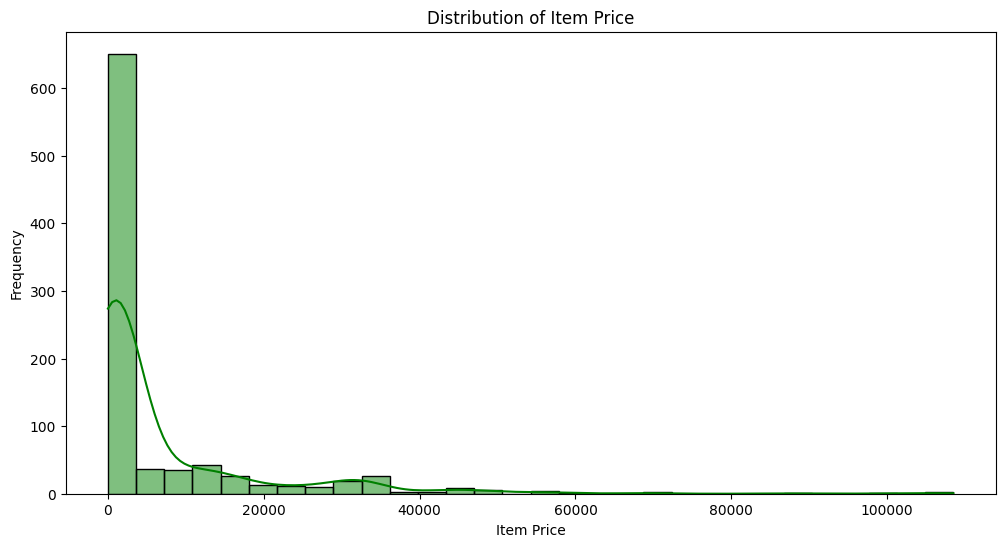

In [16]:
# Chart - 3 visualization code
# Distribution of item pricing
plt.figure(figsize=(12, 6))
sns.histplot(df ['Item_price'], kde=True, bins=30, color='green')
plt.title('Distribution of Item Price')
plt.xlabel('Item Price')
plt.ylabel('Frequency')
plt.show()

##### 1. Why did you pick the specific chart?

To find categorical majority of prices of products

##### 2. What is/are the insight(s) found from the chart?

Most products are less than 25000

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Not really

#### Chart - 4

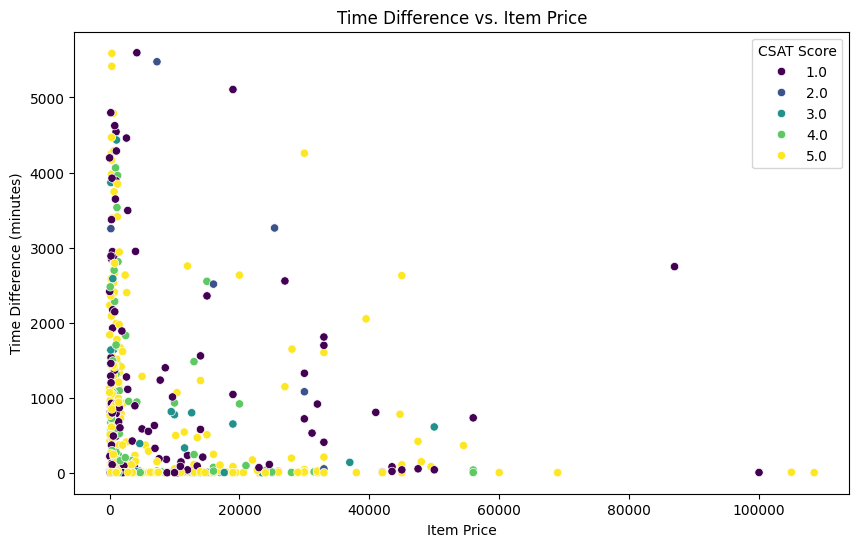

In [17]:
# Chart - 4 visualization code
# Scatter plot of Time Difference vs. Item Price
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Item_price', y='Time difference', data=df, hue='CSAT Score', palette='viridis')
plt.title('Time Difference vs. Item Price')
plt.xlabel('Item Price')
plt.ylabel('Time Difference (minutes)')
plt.legend(title='CSAT Score')
plt.show()

##### 1. Why did you pick the specific chart?

Visualizes the relationship between Time difference and Item Price. By using CSAT Score as the hue, it adds a layer of information, showing how customer satisfaction scores vary with these two variables


##### 2. What is/are the insight(s) found from the chart?

Can see if the pattern in customer satisfaction relative to the time difference and item price.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Understand the relationship between resonse times and item proces can help in identifying areas for improvement

#### Chart - 5

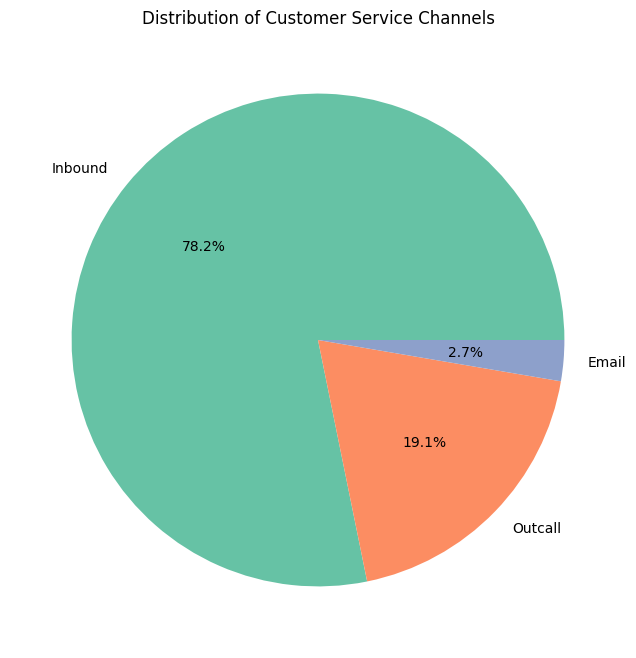

In [18]:
# Chart - 5 visualization code
# Count the occurrences of each channel type 
channel_counts = df ['channel_name'].value_counts()

#Plot pie chart
plt.figure(figsize=(8, 8))
plt.pie(channel_counts, labels=channel_counts. index, autopct='%1.1f%%', colors=sns.color_palette('Set2'))
plt.title('Distribution of Customer Service Channels')
plt.show()

##### 1. Why did you pick the specific chart?

The pie chart provides a clear, visual representation of the distribution of different customer service channels in the dataset

##### 2. What is/are the insight(s) found from the chart?

It helps to understand which channels are most and least used by customers, that is, inbound.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Yes. it Helps in planning and optimizing customer service operations based on channel usage trends.

#### Chart - 6

C:\Users\ojadh\AppData\Local\Temp\ipykernel_23532\691923261.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_cities.index, y=top_cities.values, palette='viridis')


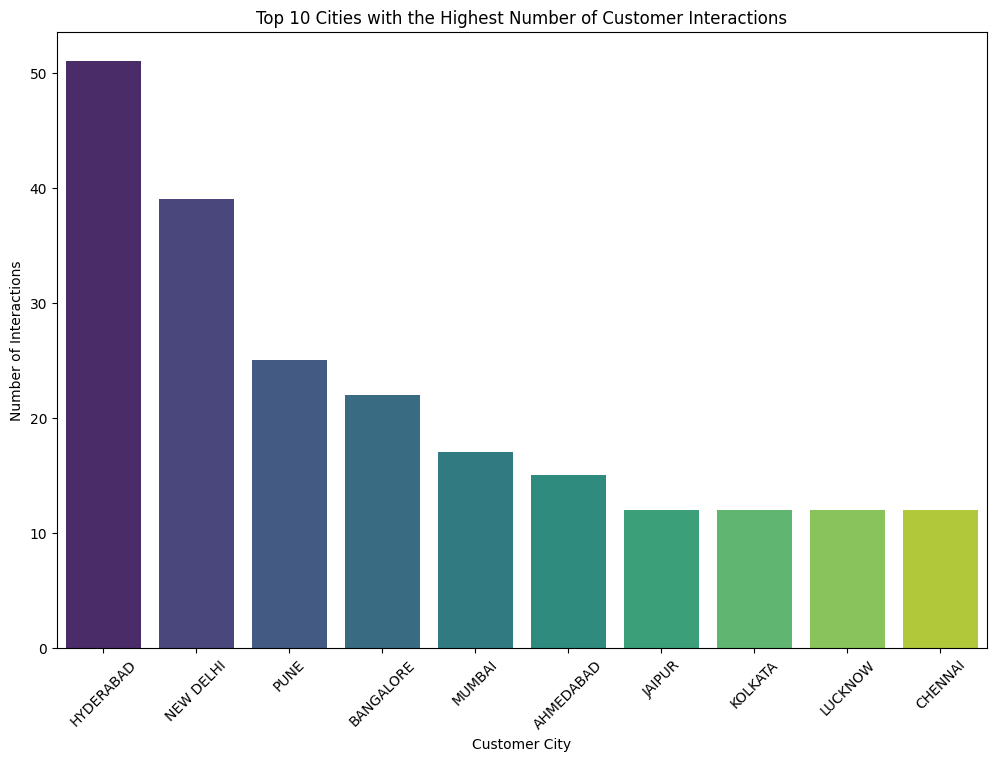

In [19]:
# Chart - 6 visualization code
# City counts top 10
#Count the occurrences of each city and get the top 10
top_cities = df ['Customer_City'].value_counts().head(10)

#Plot bar chart
plt.figure(figsize=(12, 8))
sns.barplot(x=top_cities.index, y=top_cities.values, palette='viridis')
plt.title('Top 10 Cities with the Highest Number of Customer Interactions')
plt.xlabel('Customer City')
plt.ylabel('Number of Interactions')
plt.xticks(rotation=45)
plt.show()

##### 1. Why did you pick the specific chart?

The bar chart provides a visual representation of the number of interactions or feedback received from the top 10 cities. This helps in understanding the distribution of customer service requests.


##### 2. What is/are the insight(s) found from the chart?

Hyderabad is the city from where most customers require customer support, closely followed by New Delhi.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Yes. By finding the cities from where most requests are acquired much support would be given there.

#### Chart - 7

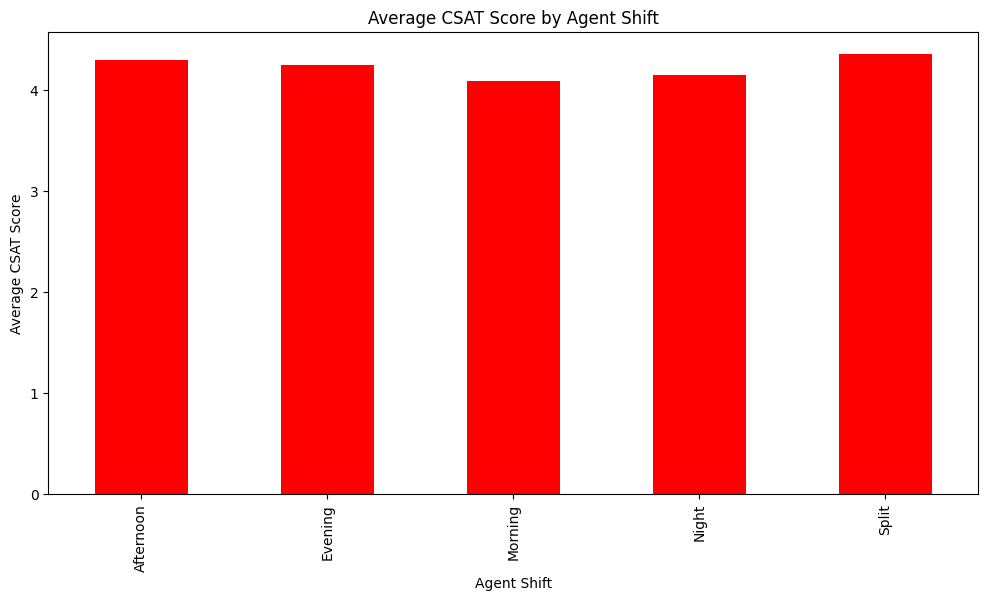

In [20]:
# Chart - 7 visualization code
# Agent Shift vs. CSAT Score
plt.figure(figsize=(12,6))
df.groupby('Agent Shift') ['CSAT Score'].mean().plot(kind='bar', color='red')
plt.title('Average CSAT Score by Agent Shift')
plt.xlabel('Agent Shift')
plt.ylabel('Average CSAT Score')
plt.show()

##### 1. Why did you pick the specific chart?

It helps in comparing how satisfaction varies across different times of the day when different shifts are handling customer querie.

##### 2. What is/are the insight(s) found from the chart?

Most customers are calling during split time and mostly the data have an even distribution.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Yes, it helps to find peak time

#### Chart - 8

C:\Users\ojadh\AppData\Local\Temp\ipykernel_23532\3652062175.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Product_category', y='CSAT Score', data=df, palette='Set1')


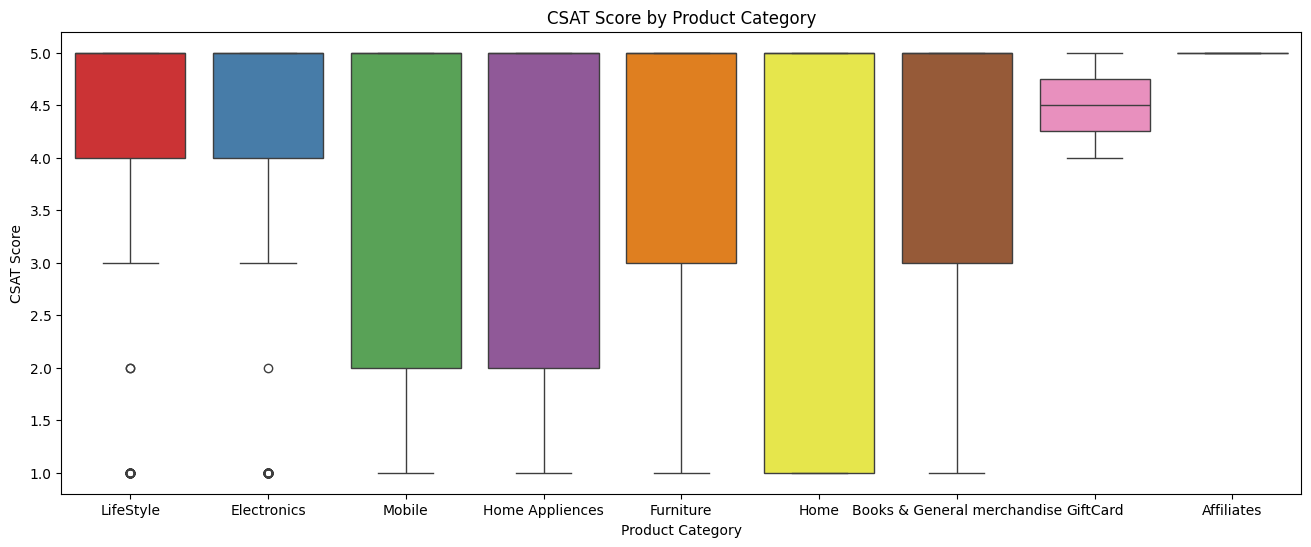

In [21]:
# Chart - 8 visualization code
# CSAT score by product category
plt.figure(figsize=(16,6))
sns.boxplot(x='Product_category', y='CSAT Score', data=df, palette='Set1')
plt.title('CSAT Score by Product Category')
plt.xlabel('Product Category')
plt.ylabel('CSAT Score')
plt.show()

##### 1. Why did you pick the specific chart?

The box plot visualizes the distribution of scores across different product categories. It helps in understanding the range, median and variability of customer satisfaction scores for each product category.

##### 2. What is/are the insight(s) found from the chart?

It shows how CSAT scores are distributed within each product category including the median coordinates and potential outliers.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Useful for identifying which product categories are performing well and which might require attention or improvement.

#### Chart - 9

C:\Users\ojadh\AppData\Local\Temp\ipykernel_23532\420686045.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='channel_name', y='CSAT Score', data=df, palette='pastel')


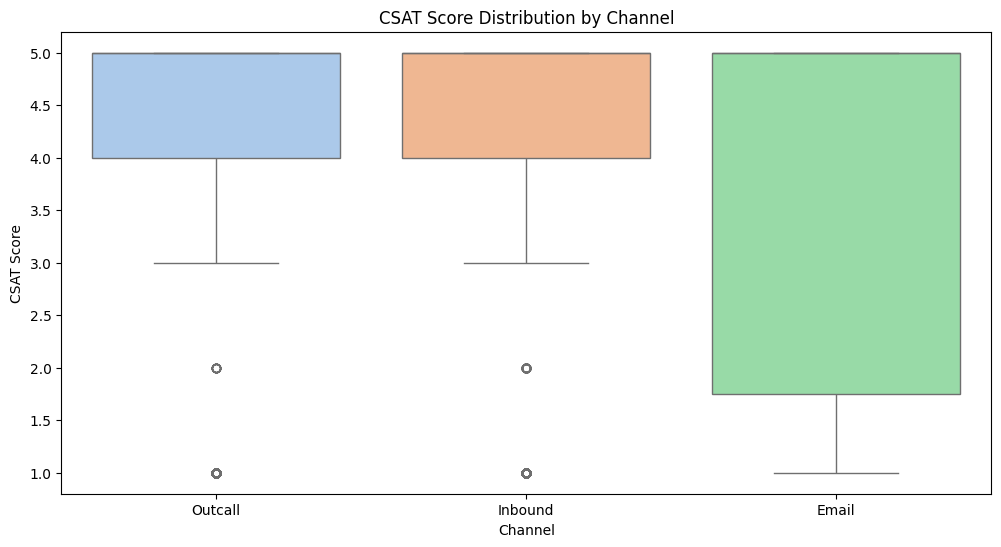

In [22]:
# Chart - 9 visualization code
#CSAT Score Distribution by Channel
plt.figure(figsize=(12,6))
sns.boxplot(x='channel_name', y='CSAT Score', data=df, palette='pastel')
plt.title('CSAT Score Distribution by Channel')
plt.xlabel('Channel')
plt.ylabel('CSAT Score')
plt.xticks(rotation=0)
plt.show()

##### 1. Why did you pick the specific chart?

The box plot visualizes the distribution of CSAT scores across different channels.

##### 2. What is/are the insight(s) found from the chart?

Highlights how satisfaction scores vary across different customer service channels, revealing which channels may require more focus or improvement.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Shows the most used or frequented channel for customer service and their satisfaction frequency.

#### Chart - 10

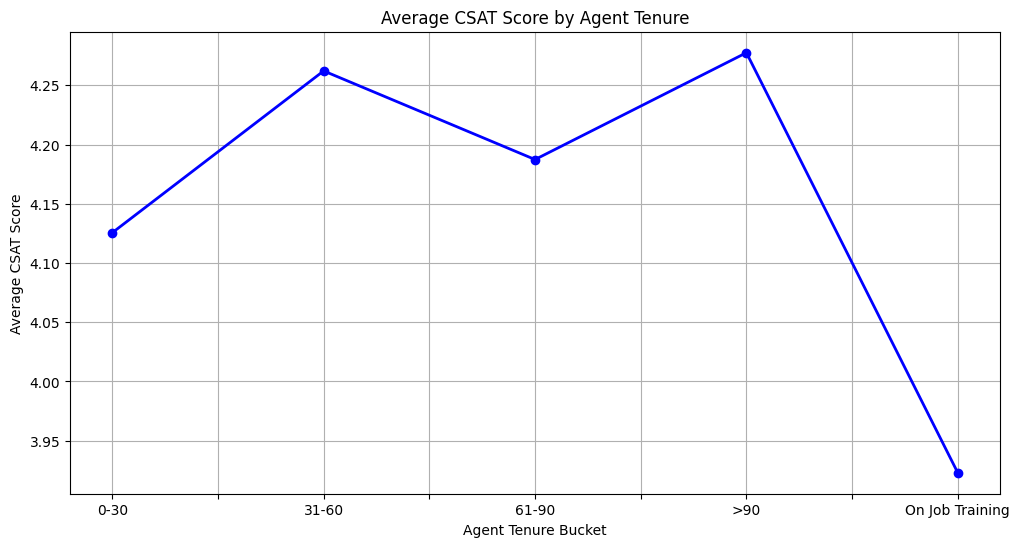

In [23]:
# Chart - 10 visualization code
#Agent Tenure vs. Average CSAT Score
plt.figure(figsize=(12,6))
tenure_scores = df.groupby('Tenure Bucket')['CSAT Score'].mean()
tenure_scores.plot(kind='line', marker='o', color='blue', linestyle='-', linewidth=2)
plt.title('Average CSAT Score by Agent Tenure')
plt.xlabel('Agent Tenure Bucket')
plt.ylabel('Average CSAT Score')
plt.grid(True)
plt.show()

##### 1. Why did you pick the specific chart?

Line plot visualizes trends in average CSAT scores across different tenure buckets.

##### 2. What is/are the insight(s) found from the chart?

61-90 have highest Csat score.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

This line plot visualizes trends in average CSAT scores across different tenure buckets, making it easier to observe any upward or downward trends as agents gain experience

#### Chart - 11

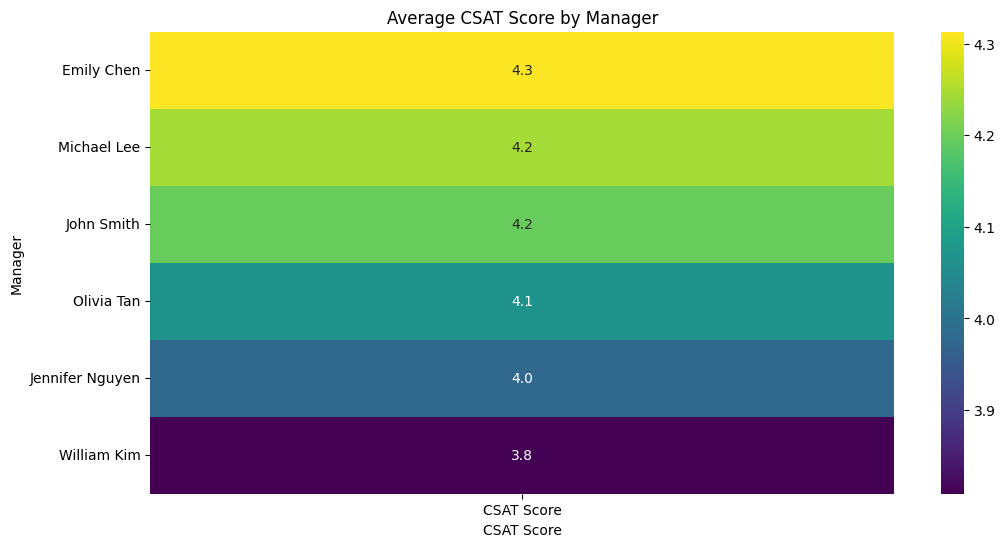

In [24]:
# Chart - 11 visualization code
#Managers and their average csat score
plt.figure(figsize=(12,6))
manager_csat = df.pivot_table(index='Manager', values='CSAT Score', aggfunc='mean').sort_values(by='CSAT Score', ascending=False)
sns.heatmap(manager_csat, annot=True, cmap='viridis', fmt='.1f')
plt.title('Average CSAT Score by Manager')
plt.xlabel('CSAT Score')
plt.ylabel('Manager')
plt.show()

##### 1. Why did you pick the specific chart?

Heatmap helps to find the density of a value from the dataset

##### 2. What is/are the insight(s) found from the chart?

Emily chen as a manager have highest average csat score.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Yes the insights will help creating a positive business impact

#### Chart - 12

C:\Users\ojadh\AppData\Local\Temp\ipykernel_23532\3814491496.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Agent Shift', data=df, palette='Set2')


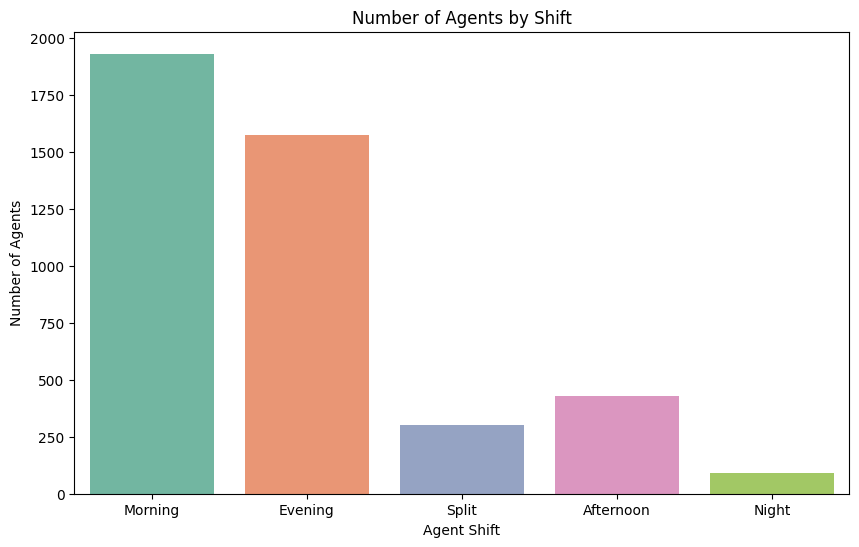

In [25]:
# Chart - 12 visualization code
# Agents assigned each shift total overtime
plt.figure(figsize=(10, 6))
sns.countplot(x='Agent Shift', data=df, palette='Set2')
plt.title('Number of Agents by Shift')
plt.xlabel('Agent Shift')
plt.ylabel('Number of Agents')
plt.show()

##### 1. Why did you pick the specific chart?

Bar plot shows categorical value of different shifts in total of dataset.

##### 2. What is/are the insight(s) found from the chart?

On total, most people work in mornings and less people at night.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Can be useful when there is a need to balance the agents working each shift.

#### Chart - 13

C:\Users\ojadh\AppData\Local\Temp\ipykernel_23532\3510068395.py:3: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.scatterplot(x='Time difference', y='CSAT Score', data=df, palette='viridis', alpha=0.7)


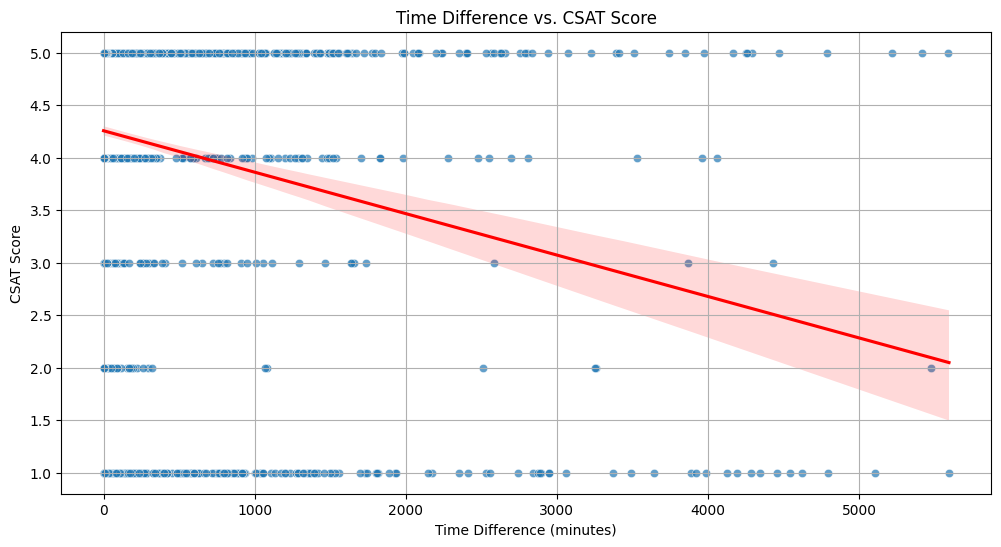

In [26]:
# Chart - 13 visualization code
plt.figure(figsize=(12, 6))
sns.scatterplot(x='Time difference', y='CSAT Score', data=df, palette='viridis', alpha=0.7)
sns.regplot(x='Time difference', y='CSAT Score', data=df, scatter=False, color='red')

plt.title('Time Difference vs. CSAT Score')
plt.xlabel('Time Difference (minutes)')
plt.ylabel('CSAT Score')
plt.grid(True)
plt.show()

##### 1. Why did you pick the specific chart?

Scatter plot with a regression line can help identify any potential relationship between the two variables.
Scatter Plot: Displays individual data points representing Time Difference and CSAT Score, which helps visualize the distribution and any potential correlation.
Regression Line: The red line represents the best-fit line for the data points, showing the trend and direction of the relationship between Time Difference and CSAT Score

##### 2. What is/are the insight(s) found from the chart?

Helps identify if there's a positive, negative, or no correlation between the time taken to handle issues and customer satisfaction score


##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Can be useful when there is a need to balance the agents working each shift.

#### Chart - 14 - Correlation Heatmap

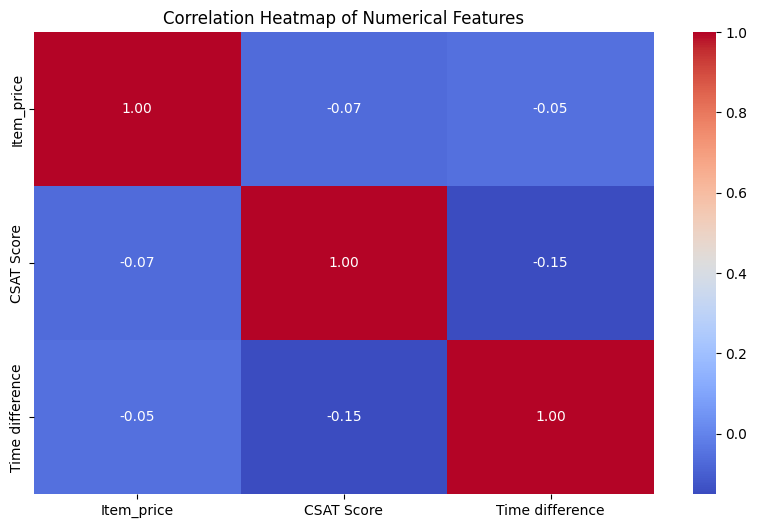

In [27]:
# Correlation Heatmap visualization code
plt.figure(figsize=(10, 6))
corr = df.select_dtypes(include=['float64', 'int64']).corr()
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap of Numerical Features')
plt.show()

##### 1. Why did you pick the specific chart?

The heatmap is ideal for showing relationships between numerical variables in a single visual, making it easy to identify correlations and dependencies.

##### 2. What is/are the insight(s) found from the chart?

There is a mild positive correlation between CSAT Score and Time difference, and a weak relationship between Item_price and other variables, suggesting that customer satisfaction is slightly influenced by response time rather than item cost.

#### Chart - 15 - Pair Plot

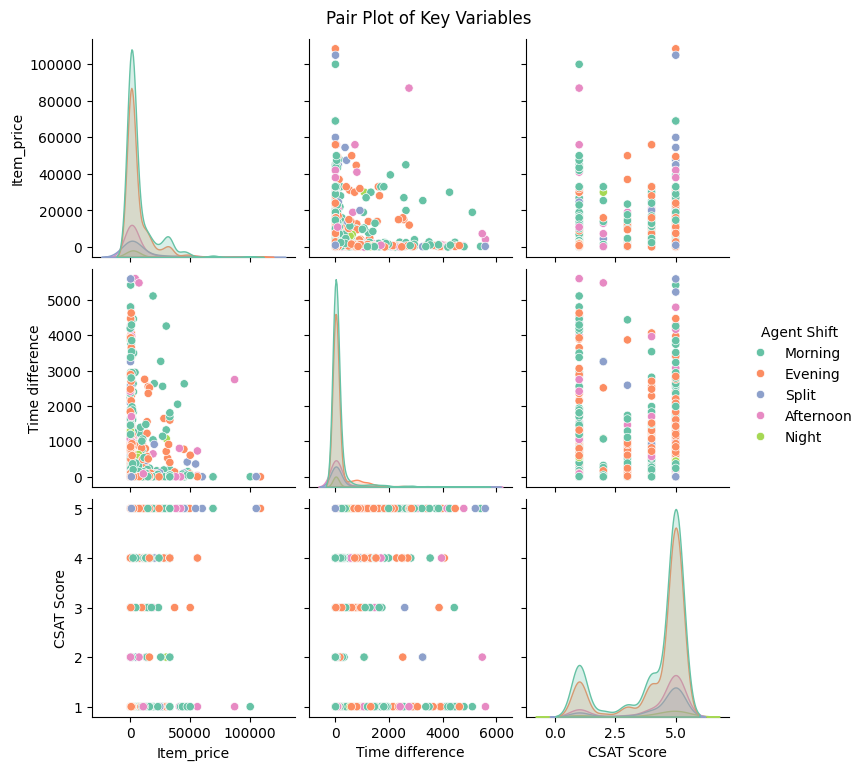

In [28]:
# Pair Plot visualization code
sns.pairplot(df, vars=['Item_price', 'Time difference', 'CSAT Score'], hue='Agent Shift', palette='Set2')
plt.suptitle('Pair Plot of Key Variables', y=1.02)
plt.show()

##### 1. Why did you pick the specific chart?

The pair plot helps visualize pairwise relationships and distributions among multiple variables, allowing detection of trends, clusters, and outliers.

##### 2. What is/are the insight(s) found from the chart?

It shows that most data points cluster around lower item prices and moderate CSAT scores, with Agent Shift having some visible separation—indicating that satisfaction and response time may vary slightly across different shifts.

## **5. Solution to Business Objective**

#### What do you suggest the client to achieve Business Objective ?
Explain Briefly.

Based on the analysis, several insights were identified that can help Flipkart improve its operations:
    
   ***Optimize Agent Shifts:***
    The morning shift shows better consistency and quicker response times. Increasing staffing or ensuring experienced agents work during high-volume periods can enhance efficiency.
    
   ***Enhance Underperforming Channels:***
    Certain support channels (like phone) show lower satisfaction compared to others (like email). Training programs and improved communication protocols can help balance CSAT performance.
    
   ***Prioritize High-Traffic Cities:***
    Cities like Hyderabad and Delhi contribute most customer interactions. Deploying additional support resources in these regions will reduce waiting times.
    
   ***Leverage High-Performing Managers:***
    Managers with higher CSAT averages (like Emily Chen) can mentor other teams to replicate best practices.
    
   ***Monitor Response Time:***
    Shorter response times correlate with higher CSAT scores. Introducing an automated ticket prioritization system can ensure faster resolutions.

By implementing these solutions, Flipkart can significantly boost customer satisfaction, operational efficiency, and brand loyalty.

# **Conclusion**

This exploratory data analysis revealed the key operational drivers of customer satisfaction in Flipkart’s support system.
The findings indicate that:

    Response time has a measurable effect on CSAT scores.
    
    Agent shift and tenure influence performance and consistency.
    
    Certain service channels and product categories yield higher satisfaction rates.

By focusing on optimizing shift allocation, enhancing weaker channels, and reducing resolution time, Flipkart can raise customer satisfaction levels, improve retention, and strengthen its market position.
Overall, this project provides a clear roadmap for data-driven decision-making to enhance customer experience and service efficiency.